## Clusterização de dados

Em certos casos, no início de uma análise, é necessário entender os dados. A clusterização permite a você verificar se existe alguma similaridade nos dados, ou mesmo se existe alguma característica em comum no conjunto.

Existem diversas técnicas de clusterização, cada uma com suas particularidades, estas indo deste simples algoritimos de distância, até mesmo redes neurais.

Aqui, vamos aprender a utilizar o KMédias, um algoritimo que através da utilização da distância euclidiana, verifica quais dados tem alguma relação (Pertencem ao mesmo grupo).

Neste exemplo vamos utilizar um conjunto de dados com diversas características de vinhos, e a implementação do KMédias utilizada será a do pacote `sklearn`.

In [15]:
# Carregando as bibliotecas
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Por este ser um conjunto de dados conhecido, ele está disponível diretamente na biblioteca `sklearn`.

In [16]:
from sklearn.datasets import load_wine

O Comando acima importou a função para carregar os dados, vamos fazer isto.

In [17]:
wine = load_wine()

Agora que os dados estão carregados, vamos verificar suas características. Lembrando que, os dados carregados com esta função, vem em uma estrutura de dados parecida com o dicionário, desta forma, com ele é possível carregar os valores diretamente através das chaves.

In [18]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Veja que, neste conjunto de dados, dentre as opções, tem-se como principais para este exemplo:

- `data`: Os dados propriamente ditos (Características dos vinhos);
- `feature_names`: Nome de cada coluna do conjunto de dados;
- `target_names`: Nomes das classes presentes no conjunto de dados.

Vamos carregar os dados para verificar o conteúdo.

In [19]:
wine.data # Você pode recuperar também utilizando o comando: wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Vamos verificar as dimensões dos dados

In [20]:
wine.data.shape

(178, 13)

Perceba que há 13 atributos nos dados, e 178 registros. Vamos através da chave `feature_names` o que são cada um dos 13 atributos. 

In [21]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Beleza, agora que sabemos o que cada atributo representa, vamos levar em consideração dois deles para criar nosso agrupamento (Clusterização).

Para o exemplo, vamos utilizar os atributos `alcohol` e `malic_acid`, estes que são os atributos das posições 0 e 1, respectivamente, da matriz de dados.

Vamos então separar estes dados e já criar um objeto do KMeans

In [22]:
alcool_e_malic = wine.data[:, 0:2]

kmeans = KMeans(n_clusters = 3, random_state = 0)

Bem, separamos as colunas 0 e 1, na variável `alcool_and_malic` e criamos o objeto `kmeans`. No caso da criação do objeto KMeans, veja que foram definidos dois parâmetros:

- `n_clusters`: Quantidade de clusters a serem gerados;
- `random_state`: Número para ajudar na determinação aleatório do centroid.

Certo, mas como eu sei que eram 3 clusters, simples, verificando o que o conjunto de dados nos diz. Como descrito acima, há um atributo nomeado `target_names`, este mostra o nome das classes presentes nos dados, e consequentemente, a quantidade de classes. Por isto, como já sabia que a quantidade de classes eram 3, coloquei isto. 

Mas há casos de você não saber a quantidade de classes, mas para isto, existem diversas formas de solução, que não vamos abordar aqui.

Então, vamos clusterizar.

In [23]:
# Clusterizando os dados
clusters = kmeans.fit(alcool_e_malic)

Pronto, agora os dados foram clusterizados. Como foi dito no início, o KMeans baseia-se em centroids, e os dados mais próximos destes são colocados em seus respectivos grupos. Vamos então ver qual foi o centroid final estimado pelo KMeans.

In [24]:
clusters.cluster_centers_

array([[13.71538462,  1.79969231],
       [12.21349206,  1.6531746 ],
       [13.0632    ,  3.8948    ]])

Certo, vamos agora classificar os dados de vinho, em classes. Lembre-se que, neste caso, para classificar os dados, os clusters criados anteriormente são utilizados como parâmetro para a classificação.

In [25]:
classificacao = kmeans.predict(alcool_e_malic)

Pronto, agora cada registro do conjunto de dados tem uma classe definida com base nos clusters criados no passo anterior.

In [26]:
classificacao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       0, 2], dtype=int32)

Por fim, vamos criar uma forma de visualizar os clusters, para entender como os dados foram distribuidos.

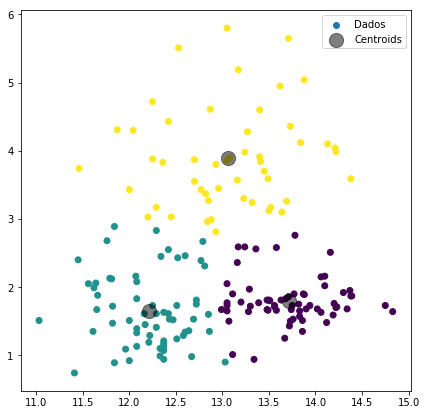

In [32]:
# Recuperando os centroids
centroids = clusters.cluster_centers_

plt.figure(figsize = (7, 7))
plt.scatter(alcool_e_malic[:, 0], alcool_e_malic[:, 1], c=classificacao)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.legend(['Dados', 'Centroids'])
plt.show()